First few rows of the dataset:
     sample_ID       RFI  1-14-0-10-45-34  172606-1  2-02-FULL-51-18  \
0  Sample_5001 -3.770883              0.0       0.0              0.0   
1  Sample_5002 -1.942963              0.0       0.0              0.0   
2  Sample_5003  2.489900              0.0       0.0              0.0   
3  Sample_5004  2.319945              0.0       0.0              0.0   
4  Sample_5005  0.396185              0.0       0.0              0.0   

   2013-40CM-41-45  20CM-2-55-15  40CM-4-68-19     70-9       A4b  ...  \
0              0.0           0.0           0.0  0.00000  0.019297  ...   
1              0.0           0.0           0.0  0.00000  0.000000  ...   
2              0.0           0.0           0.0  0.00000  0.000000  ...   
3              0.0           0.0           0.0  0.00000  0.000000  ...   
4              0.0           0.0           0.0  0.00645  0.000000  ...   

   Xanthomonadaceae_616012  Xenobiaceae  Xiphinematobacteraceae  \
0                      0

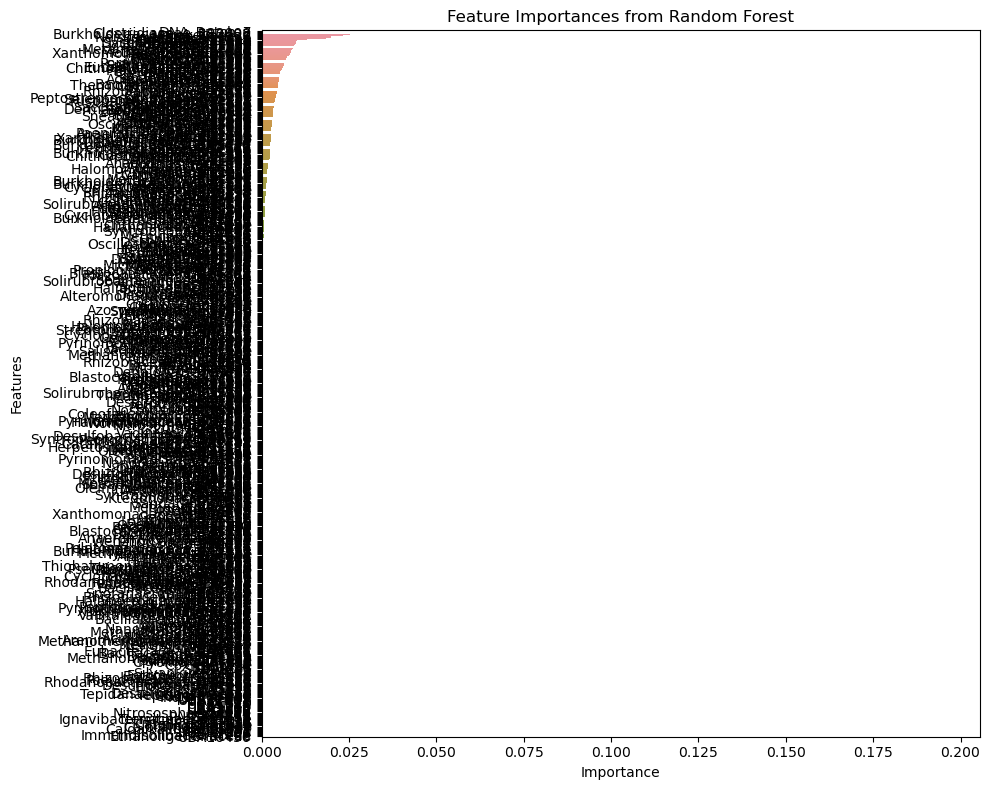


Top 20 Feature Importances:
DNA_Batch_7                  0.195775
Clostridiaceae_222000        0.042138
Burkholderiaceae_A_580492    0.028378
Moraxellaceae                0.025371
Farm_Code_F                  0.023363
Neisseriaceae_563222         0.019798
Lactobacillaceae             0.019708
Caulobacteraceae             0.018368
Brevibacillaceae             0.012845
Micrococcaceae               0.010073
Dysgonomonadaceae            0.009923
Saccharimonadaceae           0.009776
Bifidobacteriaceae           0.009707
Enterococcaceae              0.009661
DNA_Batch_9                  0.009134
Eggerthellaceae              0.008973
Metamycoplasmataceae         0.008857
Domibacillaceae              0.008559
Mycobacteriaceae             0.008531
Methanobacteriaceae          0.008484
dtype: float64


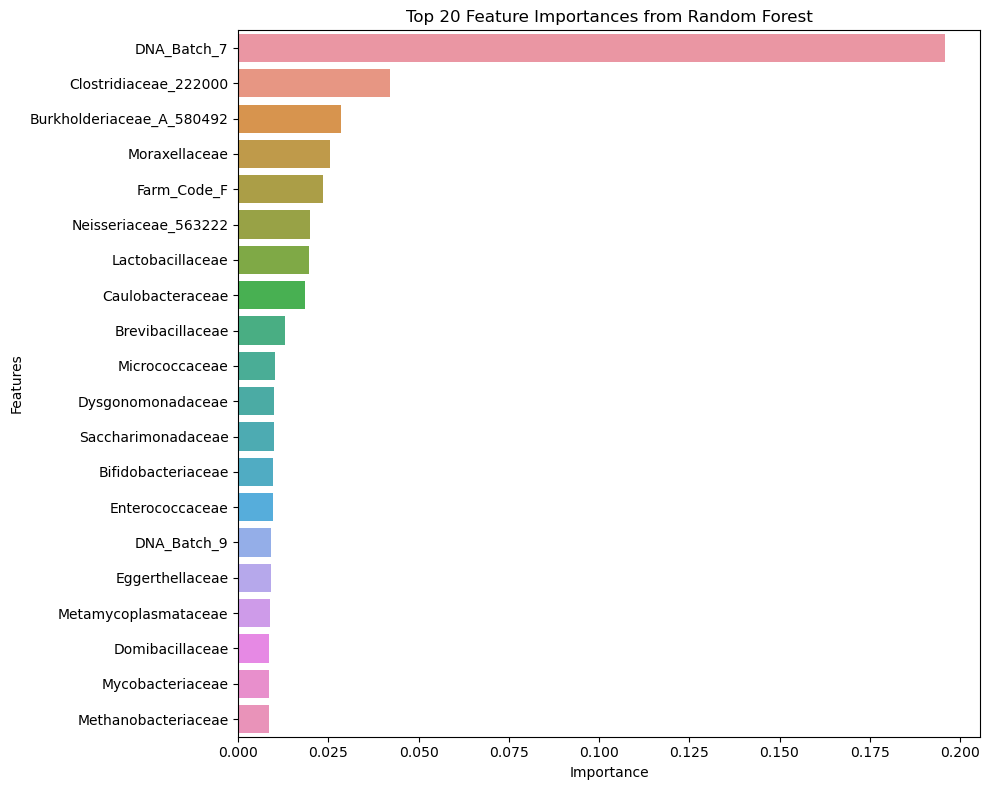

In [1]:
#lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

#datt_loaad
data = pd.read_excel('cleaned_excel_level_5_with_metadata.xlsx')
#just checkingg
print("First few rows of the dataset:")
print(data.head())

# 
data = data.drop(columns=['sample_ID'])

#if there is missing
print("\nMissing values in each column:")
print(data.isnull().sum())

#drop miss just in case
data = data.dropna()

###rfi as target
X = data.drop(columns=['RFI'])
y = data['RFI']

#OHE for the two cat metadata
X = pd.get_dummies(X, columns=['DNA_Batch', 'Farm_Code'], drop_first=True)

# 80 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=100,        # num tre
    max_depth=None,          # depth (come back for the overfit : same dir as utsav_microbiome_files)
    min_samples_split=2,     
    min_samples_leaf=1,      
    random_state=1,        
    n_jobs=-1             
)

# letsss trainn
print("\nTraining the Random Forest Regressor...")
rf.fit(X_train, y_train)

# 1st try
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nRandom Forest Regression -- R^2 Score: {r2:.4f}, RMSE: {rmse:.4f}")

#importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

#imp 
print("\nFeature Importances:")
print(feature_importances)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

#######top 20 features

#
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

#
top_features = feature_importances.head(20)

# Display the top 20 feature importances
print("\nTop 20 Feature Importances:")
print(top_features)

# Plot the top 20 feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=top_features, y=top_features.index)
plt.title('Top 20 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [2]:
print(f"\nRandom Forest Regression -- R^2 Score: {r2:.4f}, RMSE: {rmse:.4f}")


Random Forest Regression -- R^2 Score: 0.4595, RMSE: 2.1799
